In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import os
from scipy import stats


df= pd.read_csv('C:\\Users\\pooja\\Desktop\\titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [68]:
print('no of passenger in original data :' + str(len(df)))

no of passenger in original data :891


***ANALYSING DATA***

<Axes: xlabel='Survived', ylabel='count'>

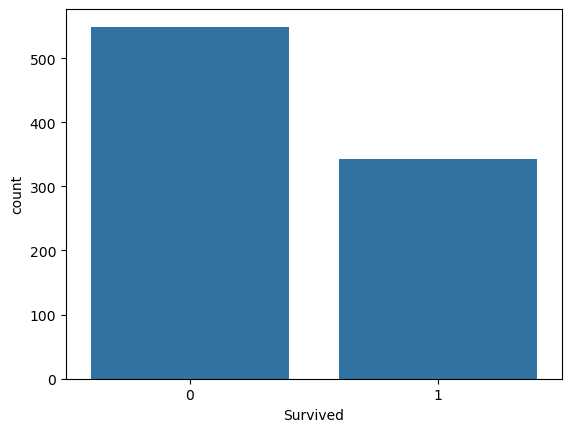

In [69]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

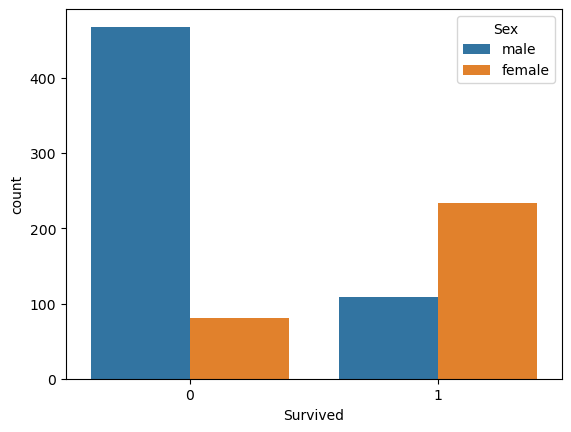

In [70]:
sns.countplot(x='Survived' , hue='Sex' , data=df)

<Axes: xlabel='Survived', ylabel='count'>

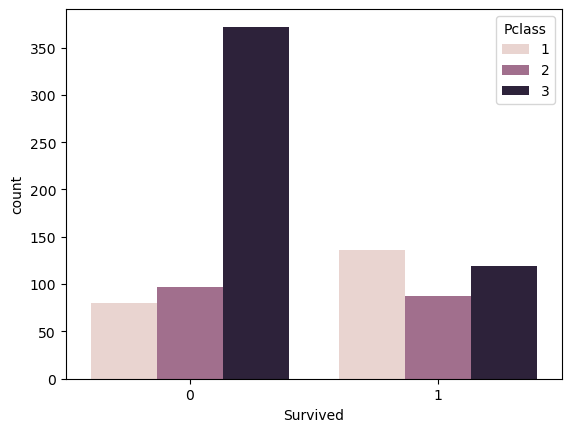

In [71]:
sns.countplot(x='Survived', hue='Pclass', data=df)

<Axes: ylabel='Frequency'>

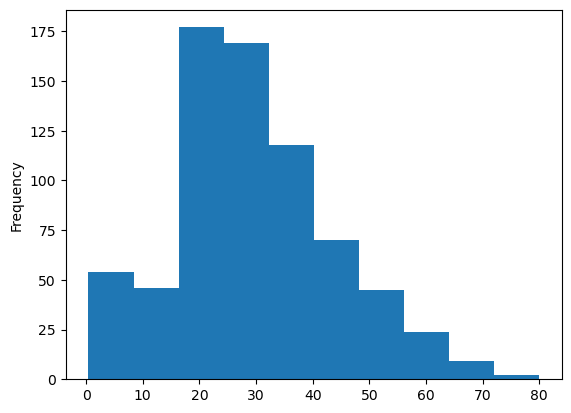

In [72]:
df['Age'].plot.hist()


<Axes: ylabel='Frequency'>

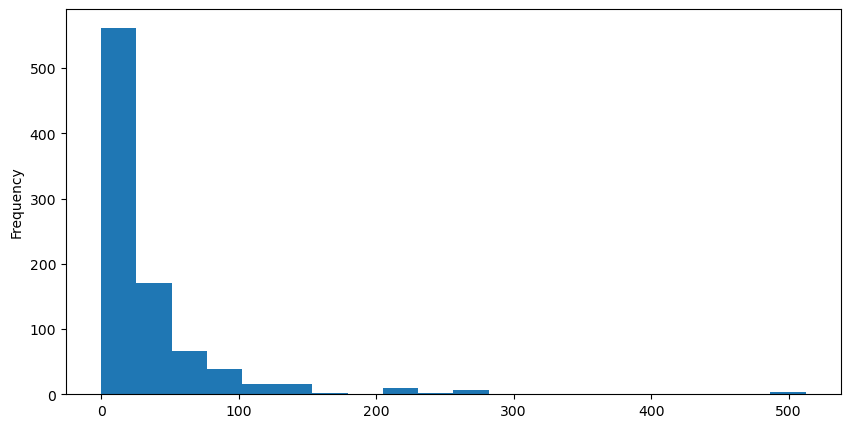

In [73]:
df['Fare'].plot.hist(bins=20,figsize=(10,5))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

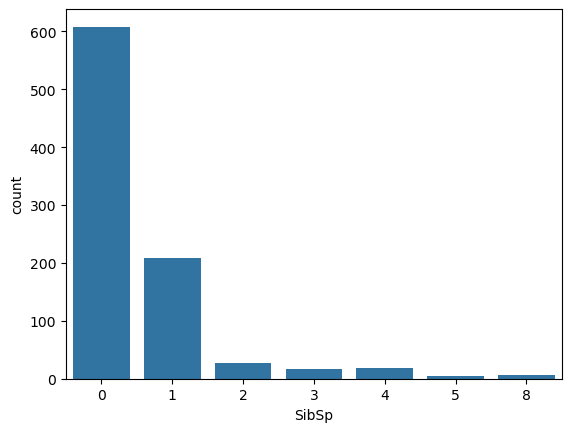

In [75]:
sns.countplot(x='SibSp', data=df)

<Axes: xlabel='Parch', ylabel='count'>

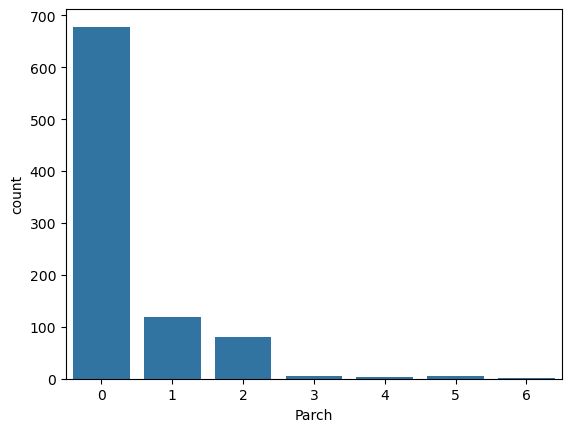

In [76]:
sns.countplot(x='Parch', data=df)

***DATA WRANGLING***

In [77]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

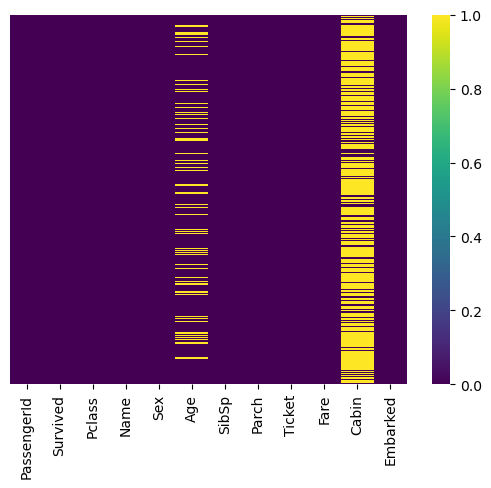

In [79]:
sns.heatmap(df.isnull() ,yticklabels=False , cmap='viridis' )

<Axes: xlabel='Pclass', ylabel='Age'>

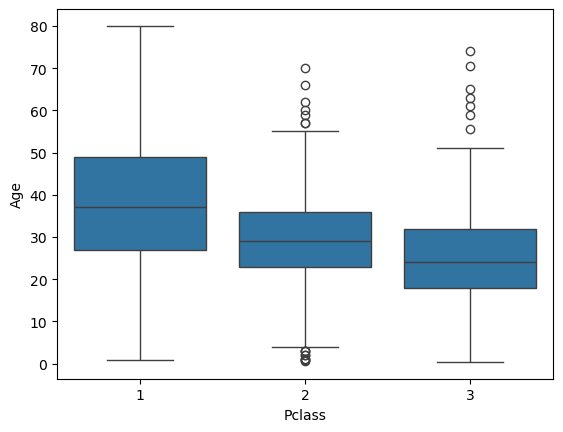

In [80]:
sns.boxplot(x='Pclass',  y='Age' , data= df)

In [81]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.drop('Cabin', axis=1 , inplace=True)

In [83]:
df.dropna(inplace=True)

<Axes: >

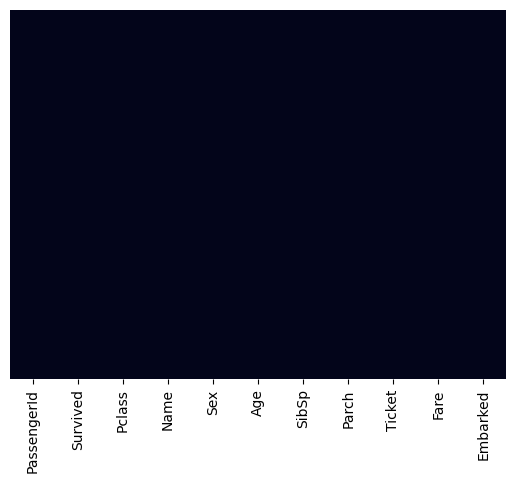

In [84]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False)

In [85]:
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
Sex=pd.get_dummies(df['Sex'], drop_first=True).astype(int)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [88]:
Embarked= pd.get_dummies(df['Embarked'], drop_first=True).astype(int)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [89]:
Pclass=pd.get_dummies(df['Pclass'], drop_first=True).astype(int)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [90]:
#Concatenate these dummy variables with the original DataFrame using pd.concat().
df = pd.concat([df, Sex], axis=1)
df=pd.concat([df,Embarked], axis=1 )
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [91]:
#to drop or delet unnecessary column
# if you are not sure its present or not you can modify the code to drop the column only if they exist 

cols__to_drop = ['Name','Ticket', 'Sex' , 'Cabin', 'Embarked' ]
df=df.drop(columns=[col for col in cols__to_drop if col in df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [92]:
cols__to_drop=['2', '3']
df=df.drop(columns=[col for col in cols__to_drop if col in df] , axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
cols__to_drop=['SibSp', 'Parch']
df=df.drop(columns=[col for col in cols__to_drop if col in df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,1,0,1
1,2,1,1,38.0,71.2833,0,0,0
2,3,1,3,26.0,7.9250,0,0,1
3,4,1,1,35.0,53.1000,0,0,1
4,5,0,3,35.0,8.0500,1,0,1


In [94]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,1,0,1
1,2,1,1,38.0,71.2833,0,0,0
2,3,1,3,26.0,7.9250,0,0,1
3,4,1,1,35.0,53.1000,0,0,1
4,5,0,3,35.0,8.0500,1,0,1


In [95]:
### coluns to check for outliers
#dropna with df[column] means its excluding the nan values
column='Fare'

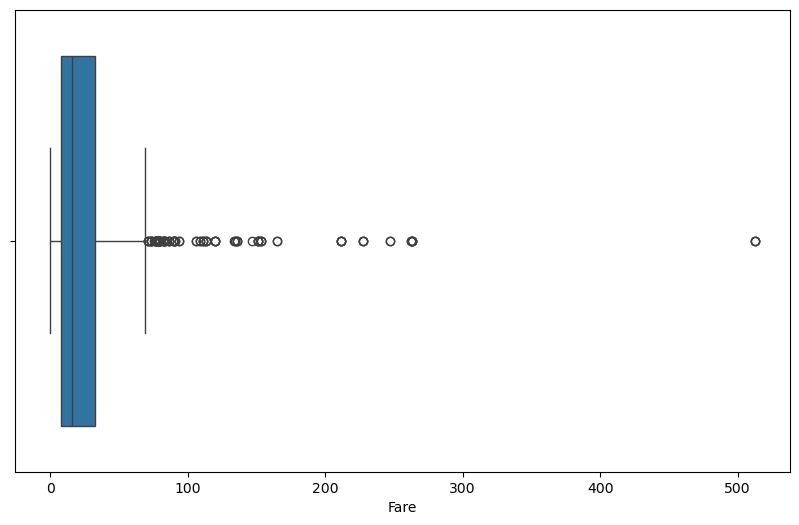

In [96]:
#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df[column].dropna() )
plt.show()

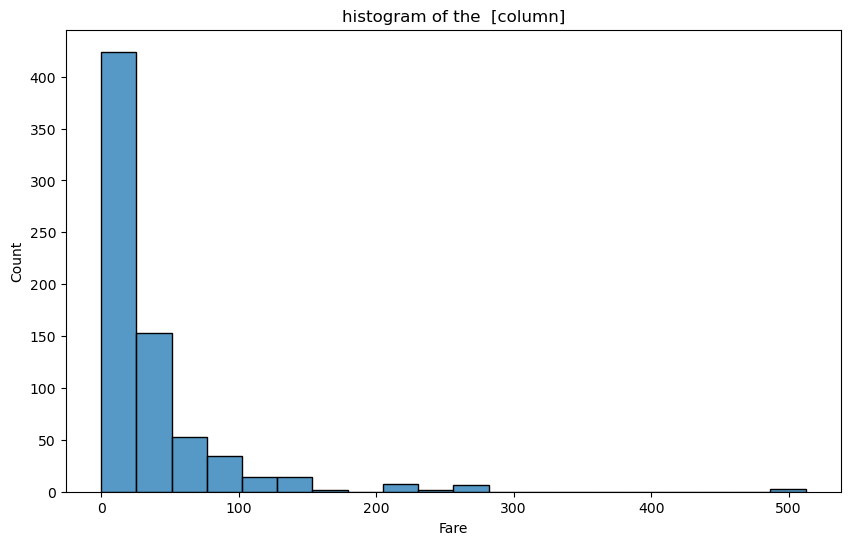

In [97]:
#column to check for outliers

#create histogram
plt.figure(figsize=(10,6))
sns.histplot(x=df[column].dropna() , bins=20, )
plt.title('histogram of the  [column]')
plt.xlabel=(column)
plt.ylabel= ('frequency')
plt.show()

In [98]:
#z score methode to detect outliers

column='Age'

#convert the column  into numpy array excluding nan values
column_np=df[column].dropna(). to_numpy()

# find mean and median deviation
mean=np.mean(column_np)
std_deviation=np.std(column_np)

#print mean and std deviation
print(f"mean: {mean}")
print(f"std_deaviation : {std_deviation}")


mean: 29.64209269662921
std_deaviation : 14.48275170278997


In [99]:
#calculate z-score value
z_scores = stats.zscore(column_np)
#print z score value
print(f"zscores : {column_np}")


zscores : [22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   45.    4.
 29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83 30.
 22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.   26.
 59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.   38.
 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.   32.5
 32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.   19.
 37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5  42.
 51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.    1.
  9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.   36.
  9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.   58.
 42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.  

In [100]:
#identifying outliers (using threshold of 3)
threshold=3
outliers= column_np[np.abs(z_scores) > threshold]

print("outliers using z score method")
print(outliers)

outliers using z score method
[80. 74.]


In [101]:
df=df.astype(float)
print(df.dtypes)

PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
Fare           float64
male           float64
Q              float64
S              float64
dtype: object


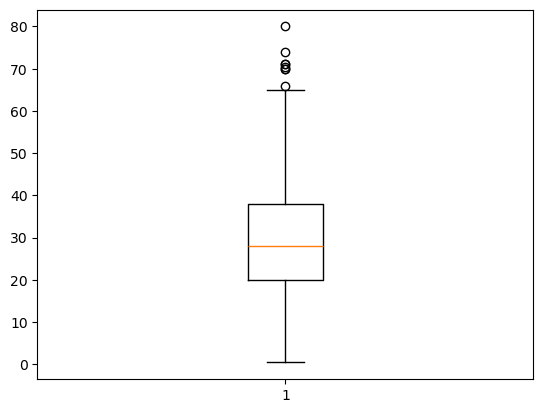

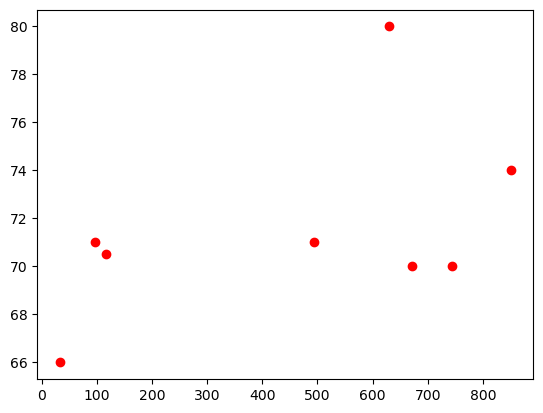

In [102]:
#filter out the outliers
#check outliers through IQR method
# Calculate the IQR for a specific column in the dataset
column_name = "Age"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1


# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]



# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

train data


In [103]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,8.0500,1.0,0.0,1.0


In [104]:
print(df.head())
print(df.dtypes)

   PassengerId  Survived  Pclass   Age     Fare  male    Q    S
0          1.0       0.0     3.0  22.0   7.2500   1.0  0.0  1.0
1          2.0       1.0     1.0  38.0  71.2833   0.0  0.0  0.0
2          3.0       1.0     3.0  26.0   7.9250   0.0  0.0  1.0
3          4.0       1.0     1.0  35.0  53.1000   0.0  0.0  1.0
4          5.0       0.0     3.0  35.0   8.0500   1.0  0.0  1.0
PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
Fare           float64
male           float64
Q              float64
S              float64
dtype: object


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [106]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,8.0500,1.0,0.0,1.0


In [107]:
x= df.drop("Survived", axis=1)
y = df["Survived"]

In [108]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42) 

In [109]:
print(x.columns)

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'male', 'Q', 'S'], dtype='object')


In [110]:
df=pd.DataFrame(df)

In [111]:
print(x.columns)

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'male', 'Q', 'S'], dtype='object')


In [112]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,8.0500,1.0,0.0,1.0


In [113]:
df=df.astype(str) #to convert into int
print(df.dtypes)


x.columns = x.columns.astype(str)     #to convert onto integer
print(df.columns)


#rename the feature name by replacing with other
df.columns=[col.replace('2', 'second') for col in df.columns]  # to replace heading 
df.columns=[col.replace('3', 'third') for col in df.columns]
print(df.head())

PassengerId    object
Survived       object
Pclass         object
Age            object
Fare           object
male           object
Q              object
S              object
dtype: object
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'male', 'Q', 'S'], dtype='object')
  PassengerId Survived Pclass   Age     Fare male    Q    S
0         1.0      0.0    3.0  22.0     7.25  1.0  0.0  1.0
1         2.0      1.0    1.0  38.0  71.2833  0.0  0.0  0.0
2         3.0      1.0    3.0  26.0    7.925  0.0  0.0  1.0
3         4.0      1.0    1.0  35.0     53.1  0.0  0.0  1.0
4         5.0      0.0    3.0  35.0     8.05  1.0  0.0  1.0


In [114]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

c:\Users\pooja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
predictions= logmodel.predict(x_test)

In [116]:
from sklearn.metrics import  classification_report

In [117]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.93      0.83        80\n         1.0       0.87      0.62      0.72        63\n\n    accuracy                           0.79       143\n   macro avg       0.81      0.77      0.78       143\nweighted avg       0.80      0.79      0.78       143\n'

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y_test , predictions)

array([[74,  6],
       [24, 39]], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(y_test , predictions)

0.7902097902097902